<a href="https://colab.research.google.com/github/Andradeadrianno/Projeto1-BCC/blob/main/Primeiro_Projeto_BCC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Base de dados sobre as Escolas da cidade de São Paulo


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:

dados = pd.read_csv("https://drive.google.com/u/3/uc?id=1Quu4pq4EToFlQYpvyYQySeHMkl3QbBOy&export=download" , sep = ";")
dados.head()

,dre,codesc,tipoesc,nomesc,ceu,diretoria,subpref,endereco,numero,bairro,cep,tel1,tel2,fax,situacao,coddist,distrito,setor,codinep,cd_cie,eh,fx_etaria,dt_criacao,ato_criacao,dom_criacao,dt_ini_conv,dt_ini_func,dt_autoriza,dt_extintao,nome_ant,rede,latitude,longitude,database
0,BT,191,EMEF,"ALIPIO CORREA NETO, PROF",NaN,DIRETORIA REGIONAL DE EDUCACAO BUTANTA,BUTANTA,Avenida JOAO CAIAFFA,140,JARDIM TABOAO,5742100,58450121.0,NaN,NaN,ATIVA,94,VILA SONIA,9404,35098462.0,38488.0,"1,621E+14",NaN,27/05/1988,26.003,27/05/1988,NaN,02/10/1988,16/03/1991,NaN,"ALIPIO CORREA NETO, PROF.",DIR,-23.612.237,-46.749.888,01/12/2019
1,BT,213,EMEI,"ANTONIO CARLOS PACHECO E SILVA, PROF",NaN,DIRETORIA REGIONAL DE EDUCACAO BUTANTA,BUTANTA,Avenida JOÃO CAIAFFA,90,JARDIM TABOÃO,5742100,58448902.0,NaN,NaN,ATIVA,94,VILA SONIA,9404,35098504.0,13506.0,"1,621E+14",NaN,07/06/1988,26.117,07/06/1988,NaN,26/09/1988,13/03/2001,NaN,"ANTONIO CARLOS PACHECO E SILVA, PROF.",DIR,-23.611.929,-46.750.176,01/12/2019
2,BT,477,EMEF,PROFA. EDA TEREZINHA CHICA MEDEIROS,NaN,DIRETORIA REGIONAL DE EDUCACAO BUTANTA,BUTANTA,Rua ENGENHEIRO HUGO TAKAHASHI,333,RAPOSO TAVARES,5563120,37820714.0,NaN,NaN,ATIVA,65,RAPOSO TAVARES,6504,35098474.0,19766.0,"1,621E+14",NaN,26/10/1988,27.212,26/10/1988,NaN,20/02/1989,16/03/1991,NaN,"EDA TEREZINHA CHICA MEDEIROS, PROFA.",DIR,-23.602.076,-46.783.825,01/12/2019
3,BT,11924,EMEF,PROFA. MARIA ALICE BORGES GHION,NaN,DIRETORIA REGIONAL DE EDUCACAO BUTANTA,BUTANTA,Rua CACHOEIRA PORAQUÊ,575,CONJUNTO PROMORAR RAPOSO TAVARES,5574450,37828909.0,37829756,NaN,ATIVA,65,RAPOSO TAVARES,6501,35076181.0,44289.0,"1,621E+14",NaN,17/02/1992,31.240,17/02/1992,NaN,20/02/1992,13/03/2001,NaN,COHAB RAPOSO TAVARES,DIR,-23.586.959,-46.801.039,01/12/2019
4,BT,14591,EMEI,PROF. BENEDICTO CASTRUCCI,NaN,DIRETORIA REGIONAL DE EDUCACAO BUTANTA,BUTANTA,Rua CACHOEIRA PORAQUE,S/N,CONJUNTO PROMORAR RAPOSO TAVARES,5574450,37814833.0,NaN,NaN,ATIVA,65,RAPOSO TAVARES,6501,35200074.0,20806.0,"1,621E+14",NaN,02/03/1994,34.005,02/03/1994,NaN,13/04/1994,13/03/2001,NaN,CONJ. HABITACIONAL RAPOSO TAVARES,DIR,-23.586.339,-46.800.967,01/12/2019


In [ ]:
dados = dados[['tipoesc', 'nomesc', 'ceu', 'diretoria', 'subpref','situacao','distrito', 'setor', 
       'fx_etaria', 'dt_criacao', 'ato_criacao', 'dom_criacao', 'dt_ini_conv',
       'dt_ini_func', 'dt_autoriza', 'dt_extintao', 'nome_ant', 'rede','latitude', 'longitude']] #selecionado as colunas com esses nomes
dados.head()




,tipoesc,nomesc,ceu,diretoria,subpref,situacao,distrito,setor,fx_etaria,dt_criacao,ato_criacao,dom_criacao,dt_ini_conv,dt_ini_func,dt_autoriza,dt_extintao,nome_ant,rede,latitude,longitude
0,EMEF,"ALIPIO CORREA NETO, PROF",NaN,DIRETORIA REGIONAL DE EDUCACAO BUTANTA,BUTANTA,ATIVA,VILA SONIA,9404,NaN,27/05/1988,26.003,27/05/1988,NaN,02/10/1988,16/03/1991,NaN,"ALIPIO CORREA NETO, PROF.",DIR,-23.612.237,-46.749.888
1,EMEI,"ANTONIO CARLOS PACHECO E SILVA, PROF",NaN,DIRETORIA REGIONAL DE EDUCACAO BUTANTA,BUTANTA,ATIVA,VILA SONIA,9404,NaN,07/06/1988,26.117,07/06/1988,NaN,26/09/1988,13/03/2001,NaN,"ANTONIO CARLOS PACHECO E SILVA, PROF.",DIR,-23.611.929,-46.750.176
2,EMEF,PROFA. EDA TEREZINHA CHICA MEDEIROS,NaN,DIRETORIA REGIONAL DE EDUCACAO BUTANTA,BUTANTA,ATIVA,RAPOSO TAVARES,6504,NaN,26/10/1988,27.212,26/10/1988,NaN,20/02/1989,16/03/1991,NaN,"EDA TEREZINHA CHICA MEDEIROS, PROFA.",DIR,-23.602.076,-46.783.825
3,EMEF,PROFA. MARIA ALICE BORGES GHION,NaN,DIRETORIA REGIONAL DE EDUCACAO BUTANTA,BUTANTA,ATIVA,RAPOSO TAVARES,6501,NaN,17/02/1992,31.240,17/02/1992,NaN,20/02/1992,13/03/2001,NaN,COHAB RAPOSO TAVARES,DIR,-23.586.959,-46.801.039
4,EMEI,PROF. BENEDICTO CASTRUCCI,NaN,DIRETORIA REGIONAL DE EDUCACAO BUTANTA,BUTANTA,ATIVA,RAPOSO TAVARES,6501,NaN,02/03/1994,34.005,02/03/1994,NaN,13/04/1994,13/03/2001,NaN,CONJ. HABITACIONAL RAPOSO TAVARES,DIR,-23.586.339,-46.800.967


## Dataframe quantidade de escola por tipo de escola e ano de criação


In [ ]:
dados_grafico2 = dados.filter(['tipoesc', 'dt_criacao']) #criando outro dataframe com as colunas tipoesc e dt_criacao
dados_grafico2 = dados_grafico2.dropna(subset =['dt_criacao']) #retirando as linhas que tiveram valores NaN na coluna dt_criacao. subset serve para indicar a coluna que deve se retirar o NaN


anos_lista = [] #criando lista vazia
for data in dados_grafico2['dt_criacao']:  #loop para acessar item por item dacoluna dt_criacao
    anos_lista.append(data[len(data)-4:len(data)]) #recortando apenas os 4 ultimos caracteres do item, os quais são somente o ano. adicionando esse ano na lista anos_lista

dados_grafico2 = dados_grafico2.drop(columns=['dt_criacao']) #recortando a coluna dt_criacao que agora nao serve mais para nós
dados_grafico2['anos_criacao'] = anos_lista  #criando uma nova coluna chamada anos_criacao que contem os anos que foram salvos na lista anos_lista

dados_grafico2_grouped = dados_grafico2.groupby(['tipoesc','anos_criacao'], as_index=False) #agrupando os valores
dados_grafico2_size = dados_grafico2_grouped.size() #contando a quantidade em cada grupo
dados_grafico2_size.head() #printando o dataframe


,tipoesc,anos_criacao,size
0,CCI/CIPS,1989,1
1,CEI DIRET,1976,2
2,CEI DIRET,1981,1
3,CEI DIRET,1984,6
4,CEI DIRET,1985,32


##Gráfico criação de escolas ao longo dos anos




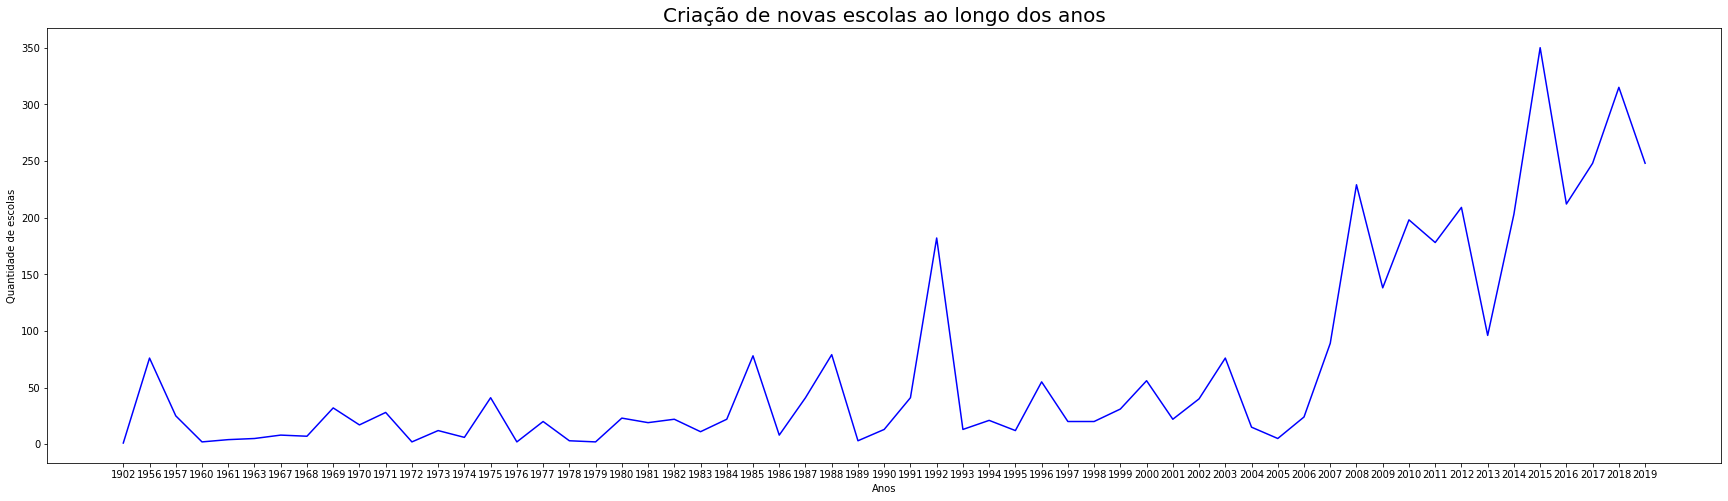

In [ ]:
#agrupando
dados_anos = pd.DataFrame(anos_lista, columns=['anos']) #criando um dataframe apenas com 1 coluna 'anos'
dados_anos_grouped= dados_anos.groupby(['anos'], as_index=False) #agrupando os dados de anos
dados_anos_grouped_size = dados_anos_grouped.size() #contando a quantidade em cada grupo de anos

#criando gráfico
fig = plt.figure(figsize=(30,8)) #criando uma figura geral para um grafico
ax = fig.add_subplot(111) #criando um grafico
ax.set_title('Criação de novas escolas ao longo dos anos', fontdict={'fontsize': 20, 'fontweight': 'medium'}) #definindo o titulo
plt.ylabel("Quantidade de escolas")  #definindo o titulo y
plt.xlabel("Anos") #definindo o titulo x
plt.plot(dados_anos_grouped_size['anos'], dados_anos_grouped_size['size'], color='b') #de fato montando o gráfico

plt.show() #mostrar o gráfico
#plt.savefig() #salvar o grafico



##Mediana de criação de escolas por ano


In [ ]:
dados_anos_grouped_size.median()[1]

23.0

##Media de criação de escolas por ano

In [ ]:
dados_anos_grouped_size.mean()[1]

67.08474576271186

##Mínimo número de criação de escolas em um ano


In [ ]:
dados_anos_grouped_size.min()

anos    1902
size       1
dtype: object

##Máximo número de criação de escolas em um ano

In [ ]:
dados_anos_grouped_size.max()

anos    2019
size     350
dtype: object

## Gráfico quantidade de tipos de escolas

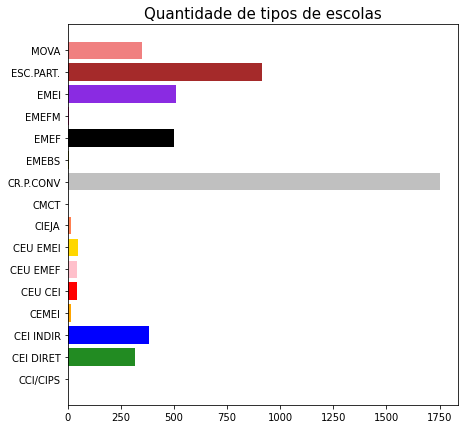

In [ ]:
import numpy as np

dados_tipoesc = dados.filter(['tipoesc'])
tipoesc_grouped = dados_tipoesc.groupby(['tipoesc'], as_index=False) #agrupandos os dados de tipoesc
tipoesc_grouped_size = tipoesc_grouped.size() #contando a quantidade em cada grupo de tipoesc

fig = plt.figure(figsize=(7,7))  #criando uma figura geral para um grafico
ax = fig.add_subplot(111) #criando um grafico na figura geral
ax.set_title('Quantidade de tipos de escolas', fontdict={'fontsize': 15, 'fontweight': 'medium'}) #definindo o titulo

my_colors= np.array(["crimson", "forestgreen", "blue", "orange", "red", "pink", "gold", "coral", "aqua", "silver", "olive","black", "deeppink", "blueviolet", "brown", "lightcoral"])

plt.barh(tipoesc_grouped_size['tipoesc'], tipoesc_grouped_size['size'], color=my_colors) #criando o grafico de barras
#width=0.8
 
plt.show()




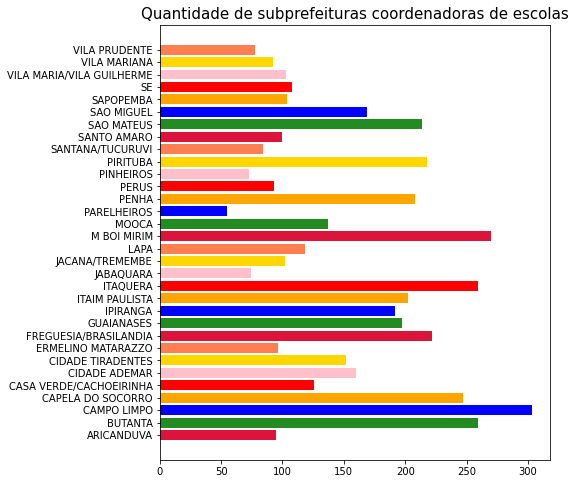

In [ ]:
import numpy as np #importando biblioteca numpy
dados_subpref = dados.filter(['subpref']) #criando dataframe somente com a coluna subpref

grouped_subpref = dados_subpref.groupby(['subpref'], as_index=False) #agrupandos os dados de subpref
grouped_subpref_size = grouped_subpref.size() #contando a quantidade em cada grupo de subpref

fig = plt.figure(figsize=(7,8)) #criando uma figura geral para um grafico
ax = fig.add_subplot(111)#criando um grafico na figura geral
ax.set_title('Quantidade de subprefeituras coordenadoras de escolas', fontdict={'fontsize': 15, 'fontweight': 'medium'})
my_colors= np.array(["crimson", "forestgreen", "blue", "orange", "red", "pink", "gold", "coral"])
plt.barh(grouped_subpref_size['subpref'], grouped_subpref_size['size'], color=my_colors) 
plt.show()

## Média de responsabilidade das subprefeituras


In [ ]:
grouped_subpref_size.mean()

size    153.4375
dtype: float64

## Máximo de responsabilidade de uma subprefeitura


In [ ]:
grouped_subpref_size.max()

subpref    VILA PRUDENTE
size                 303
dtype: object

##Relacionando subpref com tipo de escola

In [ ]:
dadosselecionados = dados.filter(['subpref', 'tipoesc']) #criando dadaframe com subpref e tipoesc
grouped = dadosselecionados.groupby(['subpref', 'tipoesc'], as_index=False) #agrupando subpref e tipoesc
grouped_size = grouped.size() #contando a quantidade de grupos juntando subpref e tipoesc
unico_subpref = pd.unique(list(grouped_size['subpref'])) #selecionando os nomes únicos(sem repartir)  na coluna subpref
unico_esc = pd.unique(list(grouped_size['tipoesc'])) #selecionando os nome únicos na coluna tipoesc
lista = [] #criando lista vazia para comportar os dicionarios

for j in unico_esc: #percorre item por item de tipoesc
  dicionario = {}
  for i in unico_subpref: #percorre item por item de subpref
    dicionario[i] = 0 #um dicionario para cada tipoesc, vao servir como barra no grafico
    for index, row in grouped_size.iterrows(): #percorrendo linha por linha do dataframe
      if i == row[0] and j == row[1]: #row[0]= nome do subpref, row[1]=nome do tipoesc, vendo se esses itens são iguais no dataframe e nas listas unico_esc e unico_subpref
        dicionario[i] = row[2] # row[2]= tamanho dos grupos #se o resultado na linha de cima for positivo, vai acrescentar row[2] no dicionario
  lista.append(dicionario) #adiciona o dicionario a lista

#cada dicioanario da lista é sobre um tipoesc
for i, j in zip(lista, unico_esc):
  print(j, i) #printando um item do unico_esc e um dicionario da lista

CEI DIRET {'ARICANDUVA': 3, 'BUTANTA': 14, 'CAMPO LIMPO': 20, 'CAPELA DO SOCORRO': 22, 'CASA VERDE/CACHOEIRINHA': 6, 'CIDADE ADEMAR': 8, 'CIDADE TIRADENTES': 15, 'ERMELINO MATARAZZO': 13, 'FREGUESIA/BRASILANDIA': 9, 'GUAIANASES': 9, 'IPIRANGA': 10, 'ITAIM PAULISTA': 20, 'ITAQUERA': 18, 'JABAQUARA': 5, 'JACANA/TREMEMBE': 8, 'LAPA': 2, 'M BOI MIRIM': 21, 'MOOCA': 3, 'PARELHEIROS': 2, 'PENHA': 15, 'PERUS': 5, 'PINHEIROS': 1, 'PIRITUBA': 15, 'SANTANA/TUCURUVI': 8, 'SANTO AMARO': 3, 'SAO MATEUS': 18, 'SAO MIGUEL': 16, 'SAPOPEMBA': 10, 'SE': 5, 'VILA MARIA/VILA GUILHERME': 7, 'VILA MARIANA': 3, 'VILA PRUDENTE': 3}
CEI INDIR {'ARICANDUVA': 6, 'BUTANTA': 14, 'CAMPO LIMPO': 18, 'CAPELA DO SOCORRO': 23, 'CASA VERDE/CACHOEIRINHA': 5, 'CIDADE ADEMAR': 11, 'CIDADE TIRADENTES': 10, 'ERMELINO MATARAZZO': 6, 'FREGUESIA/BRASILANDIA': 18, 'GUAIANASES': 8, 'IPIRANGA': 18, 'ITAIM PAULISTA': 16, 'ITAQUERA': 30, 'JABAQUARA': 11, 'JACANA/TREMEMBE': 8, 'LAPA': 7, 'M BOI MIRIM': 12, 'MOOCA': 9, 'PARELHEIROS': 

In [ ]:
import random as rd